Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
Какой клиент совершил больше всего успешных операций? (success == True)
С какой платформы осуществляется наибольшее количество успешных операций?
Какую платформу предпочитают премиумные клиенты?
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
Постройте график распределения числа успешных операций
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
Описание данных
user_data:

client – идентификатор пользователя
premium – является ли клиент премиум
age – возраст
logs:

client – идентификатор пользователя
success – результат (успех - 1, нет - 0)
platform – платформа
time – время в формате Unix

In [20]:
import pandas as pd
user = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/gVoTPY6r41nZnw'
logs = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/e8IXUUVw9k-bIg'

user_data = pd.read_csv(user)
df_logs = pd.read_csv(logs)

In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [125]:
df_logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [231]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [217]:
df_logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. 

In [34]:
suc_client = df_logs.query('success == True') \
    .groupby('client') \
    .agg({'success': 'count'}) \
    .rename(columns={'success':'sucsess_counts'}) \
    .query('sucsess_counts == sucsess_counts.max()')  \
    .sort_values('client')
  

In [35]:
suc_client

,sucsess_counts
client,
12179,41
28719,41
36165,41
52870,41
61468,41
61473,41
78349,41
82563,41
92584,41


In [206]:
suc_client.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

С какой платформы осуществляется наибольшее количество успешных операций?

In [220]:
suc_platform = df_logs.query('success == True') \
    .groupby('platform', as_index = False) \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending = False)

In [221]:
suc_platform

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


Какая платформа наиболее популярна среди премиумных клиентов?
Необходимо объединить два DataFrame user_data, df_logs по client

In [19]:
user_logs = user_data.merge(df_logs, on='client', how='inner')
user_logs.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [8]:
lov_platform = user_logs.query('premium == True') \
    .groupby('platform', as_index = False) \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending = False)

In [9]:
lov_platform

,platform,success
1,phone,246
0,computer,150
2,tablet,24


user_logs.loc(user_logs.premium == True).platform.value_counts().idxmax() 

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 


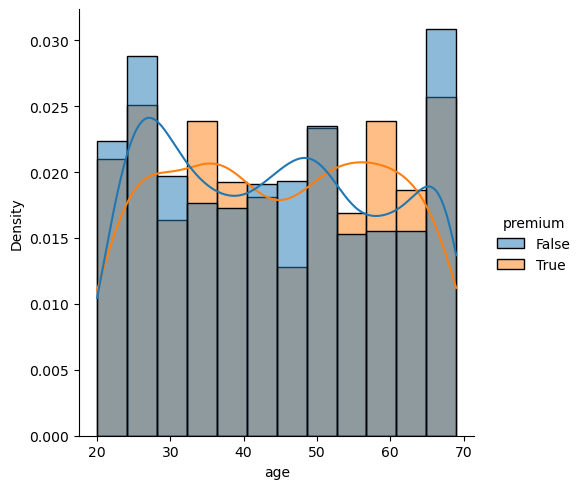

In [48]:
sns.displot(data=user_logs, x="age", hue="premium", kde=True, kind='hist', stat='density', common_norm=False, bins=12)

Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших столько успешных операций

In [42]:
success_count = df_logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success': 'count'}) \
    .rename(columns={'success':'suc_counts'}) 
success_count
  

,client,suc_counts
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1
...,...,...
2840,99926,1
2841,99927,1
2842,99931,1
2843,99973,1


<AxesSubplot:xlabel='suc_counts', ylabel='count'>

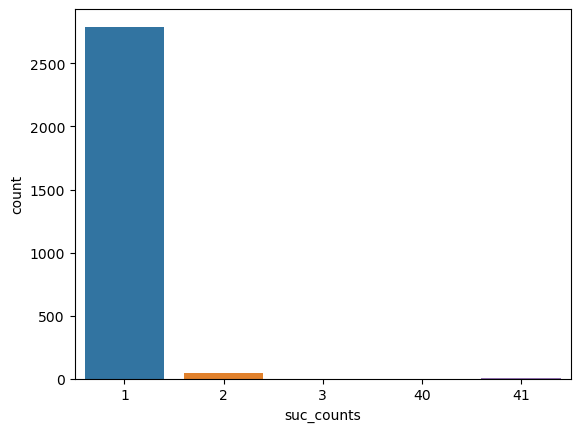

In [95]:
sns.countplot(data = success_count, x='suc_counts')

⭐️Задание со звёздочкой!⭐️

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Полезные ссылки:

sns.countplot – документация к типу графика
figsize – про размер графиков
Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [88]:
success_comp = user_logs.query('success == True and platform == "computer"') \
    .groupby(['client', 'age','platform'], as_index = False) \
    .agg({'success': 'count'}) \
    .rename(columns={'success':'suc_counts'}) 
success_comp
  

,client,age,platform,suc_counts
0,164,37,computer,1
1,405,37,computer,1
2,991,69,computer,1
3,995,28,computer,1
4,1057,65,computer,1
...,...,...,...,...
713,99592,35,computer,1
714,99636,44,computer,1
715,99864,26,computer,1
716,99868,39,computer,1


In [70]:
import matplotlib.pyplot as plt

%matplotlib inline 

<AxesSubplot:xlabel='age', ylabel='count'>

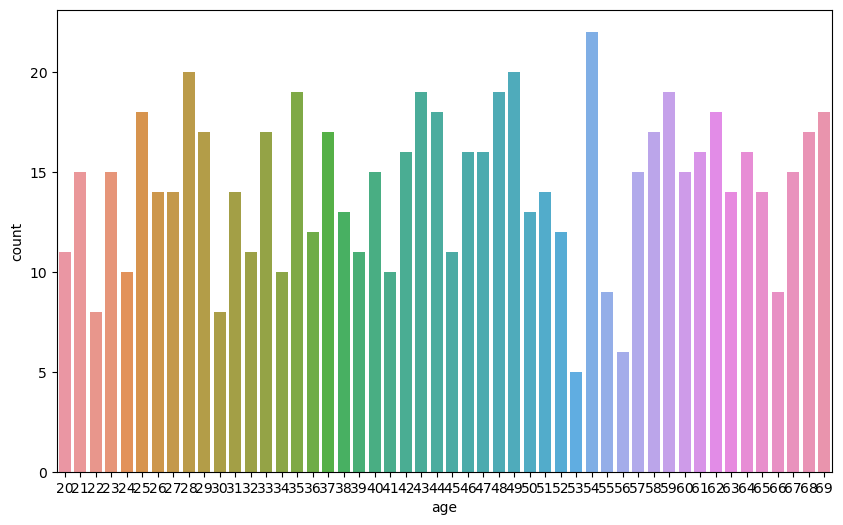

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(data = success_comp, x ='age')


<AxesSubplot:xlabel='age', ylabel='count'>

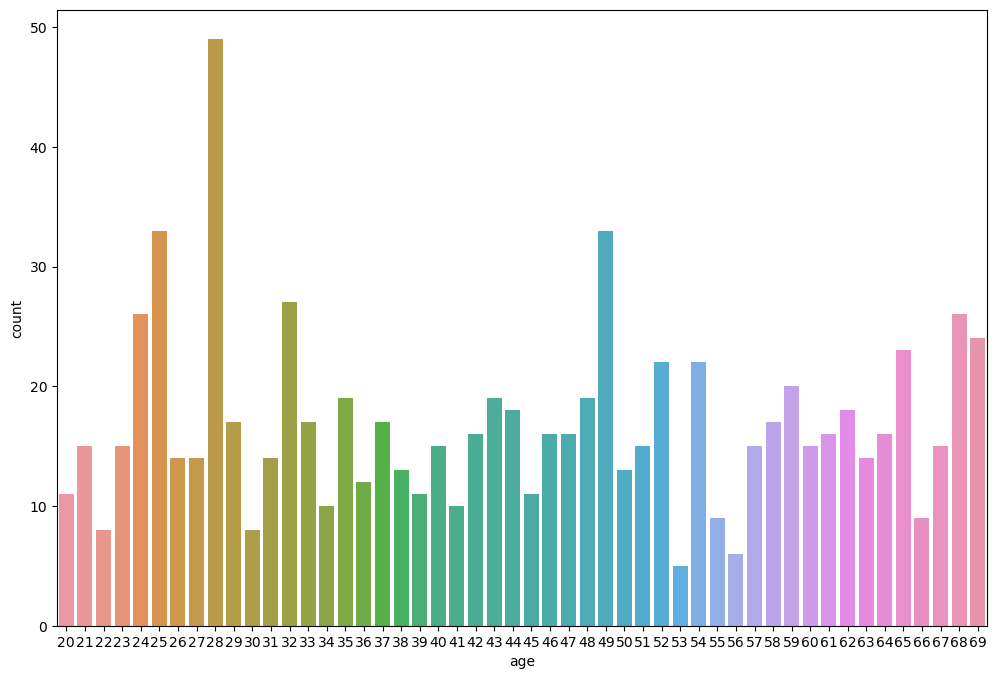

In [74]:
plt.figure(figsize=(12, 8))
sns.countplot(data=user_logs.loc[(user_logs.success == True) & (user_logs.platform == 'computer')], x ='age' )